___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline
import seaborn as sns

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [2]:
start=datetime.datetime(2006,1,1)
end=datetime.datetime(2016,1,1)
BAC=data.DataReader("BAC",'yahoo',start,end)
C=data.DataReader("C",'yahoo',start,end)
GS=data.DataReader("GS",'yahoo',start,end)
JC=data.DataReader("JPM",'yahoo',start,end)
MS=data.DataReader("MS",'yahoo',start,end)
WF=data.DataReader("WFC",'yahoo',start,end)

In [3]:
BAC.head(2)


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,47.180000,46.150002,46.919998,47.080002,16296700.0,34.811729
2006-01-04,47.240002,46.450001,47.000000,46.580002,17757900.0,34.442013


In [4]:
C.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,493.799988,481.100006,490.000000,492.899994,1537600.0,431.119202
2006-01-04,491.000000,483.500000,488.600006,483.799988,1870900.0,423.159882


In [5]:
GS.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,129.440002,124.230003,126.699997,128.869995,6188700.0,106.263367
2006-01-04,128.910004,126.379997,127.349998,127.089996,4861600.0,104.795609


In [6]:
JC.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,40.360001,39.299999,39.830002,40.189999,12838600.0,27.013376
2006-01-04,40.139999,39.419998,39.779999,39.619999,13491500.0,26.857462


In [7]:
MS.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,36.896912
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,36.922207


In [8]:
WF.head(2)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,31.975,31.195,31.600000,31.900000,11016400.0,20.231974
2006-01-04,31.820,31.365,31.799999,31.530001,10870000.0,19.997309


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [9]:
tickers=['BAC','GS','C','JC','MS','WF']

In [10]:
tickers.sort()

In [11]:
tickers

['BAC', 'C', 'GS', 'JC', 'MS', 'WF']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [12]:
bank_stocks=pd.concat([BAC,GS,C,JC,MS,WF],axis=1,keys=tickers)
bank_stocks

BAC                                                          \
                 High        Low       Open      Close      Volume  Adj Close   
Date                                                                            
2006-01-03  47.180000  46.150002  46.919998  47.080002  16296700.0  34.811729   
2006-01-04  47.240002  46.450001  47.000000  46.580002  17757900.0  34.442013   
2006-01-05  46.830002  46.320000  46.580002  46.639999  14970700.0  34.486385   
2006-01-06  46.910000  46.349998  46.799999  46.570000  12599800.0  34.434616   
2006-01-09  46.970001  46.360001  46.720001  46.599998  15619400.0  34.456806   
...               ...        ...        ...        ...         ...        ...   
2015-12-24  17.379999  17.219999  17.320000  17.270000  29369400.0  15.749325   
2015-12-28  17.230000  16.980000  17.219999  17.129999  41777500.0  15.621654   
2015-12-29  17.350000  17.160000  17.250000  17.280001  45670400.0  15.758445   
2015-12-30  17.240000  17.040001  17.200001  17.049999  35066400.0  15.548695   
2015-12-31  17.070000  16.830000  17.010000  16.830000  47153000.0  15.348064   

                     C                                      ...         MS  \
                  High         Low        Open       Close  ...       Open   
Date                                                        ...              
2006-01-03  129.440002  124.230003  126.699997  128.869995  ...  57.169998   
2006-01-04  128.910004  126.379997  127.349998  127.089996  ...  58.700001   
2006-01-05  127.320000  125.610001  126.000000  127.040001  ...  58.549999   
2006-01-06  129.250000  127.290001  127.290001  128.839996  ...  58.770000   
2006-01-09  130.619995  128.000000  128.500000  130.389999  ...  58.630001   
...                ...         ...         ...         ...  ...        ...   
2015-12-24  183.169998  182.020004  182.270004  182.470001  ...  32.570000   
2015-12-28  181.929993  179.839996  181.770004  181.619995  ...  32.360001   
2015-12-29  184.179993  182.500000  182.820007  183.529999  ...  32.439999   
2015-12-30  183.529999  181.839996  183.279999  182.009995  ...  32.500000   
2015-12-31  182.889999  180.029999  181.160004  180.229996  ...  31.910000   

                                                    WF                        \
                Close     Volume  Adj Close       High        Low       Open   
Date                                                                           
2006-01-03  58.310001  5377000.0  36.896912  31.975000  31.195000  31.600000   
2006-01-04  58.349998  7977800.0  36.922207  31.820000  31.365000  31.799999   
2006-01-05  58.509998  5778000.0  37.023464  31.555000  31.309999  31.500000   
2006-01-06  58.570000  6889800.0  37.061440  31.775000  31.385000  31.580000   
2006-01-09  59.189999  4144500.0  37.453743  31.825001  31.555000  31.674999   
...               ...        ...        ...        ...        ...        ...   
2015-12-24  32.480000  2798200.0  28.702150  55.090000  54.709999  54.970001   
2015-12-28  32.169998  5420300.0  28.428209  54.779999  54.169998  54.549999   
2015-12-29  32.549999  6388200.0  28.764009  55.349998  54.990002  55.110001   
2015-12-30  32.230000  5057200.0  28.481230  55.310001  54.790001  55.270000   
2015-12-31  31.809999  8154300.0  28.110079  54.950001  54.220001  54.509998   

                                              
                Close      Volume  Adj Close  
Date                                          
2006-01-03  31.900000  11016400.0  20.231974  
2006-01-04  31.530001  10870000.0  19.997309  
2006-01-05  31.495001  10158000.0  19.975113  
2006-01-06  31.680000   8403800.0  20.092442  
2006-01-09  31.674999   5619600.0  20.089270  
...               ...         ...        ...  
2015-12-24  54.820000   4999400.0  46.380711  
2015-12-28  54.680000   8288800.0  46.262257  
2015-12-29  55.290001   7894900.0  46.778351  
2015-12-30  54.889999   8016900.0  46.439926  
2015-12-31  54.360001  10929800.0  45.991516  

[2517 rows

** Set the column name levels (this is filled out for you):**

In [13]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [14]:
bank_stocks.head()

Bank Ticker        BAC                                               \
Stock Info        High        Low       Open      Close      Volume   
Date                                                                  
2006-01-03   47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04   47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05   46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06   46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09   46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Ticker                      C                                      ...  \
Stock Info   Adj Close        High         Low        Open       Close  ...   
Date                                                                    ...   
2006-01-03   34.811729  129.440002  124.230003  126.699997  128.869995  ...   
2006-01-04   34.442013  128.910004  126.379997  127.349998  127.089996  ...   
2006-01-05   34.486385  127.320000  125.610001  126.000000  127.040001  ...   
2006-01-06   34.434616  129.250000  127.290001  127.290001  128.839996  ...   
2006-01-09   34.456806  130.619995  128.000000  128.500000  130.389999  ...   

Bank Ticker         MS                                          WF             \
Stock Info        Open      Close     Volume  Adj Close       High        Low   
Date                                                                            
2006-01-03   57.169998  58.310001  5377000.0  36.896912  31.975000  31.195000   
2006-01-04   58.700001  58.349998  7977800.0  36.922207  31.820000  31.365000   
2006-01-05   58.549999  58.509998  5778000.0  37.023464  31.555000  31.309999   
2006-01-06   58.770000  58.570000  6889800.0  37.061440  31.775000  31.385000   
2006-01-09   58.630001  59.189999  4144500.0  37.453743  31.825001  31.555000   

Bank Ticker                                               
Stock Info        Open      Close      Volume  Adj Close  
Date                                                      
2006-01-03   31.600000  31.900000  11016400.0  20.231974  
2006-01-04   31.799999  31.530001  10870000.0  19.997309  
2006-01-05   31.500000  31.495001  10158000.0  19.975113  
2006-01-06   31.580000  31.680000   8403800.0  20.092442  
2006-01-09   31.674999  31.674999   5619600.0  20.089270  

[5 rows x 36 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [15]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.900002
C      247.919998
GS     564.099976
JC      70.080002
MS      89.300003
WF      58.520000
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [16]:
returns=pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [17]:
for tick in tickers:
    returns[tick+ ' Return']=bank_stocks[tick]['Close'].pct_change()
returns.head()  

,BAC Return,C Return,GS Return,JC Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.013812,-0.018462,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,-0.000393,0.004961,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.014169,0.000000,0.007046,0.001025,0.005874
2006-01-09,0.000644,0.012030,-0.004731,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

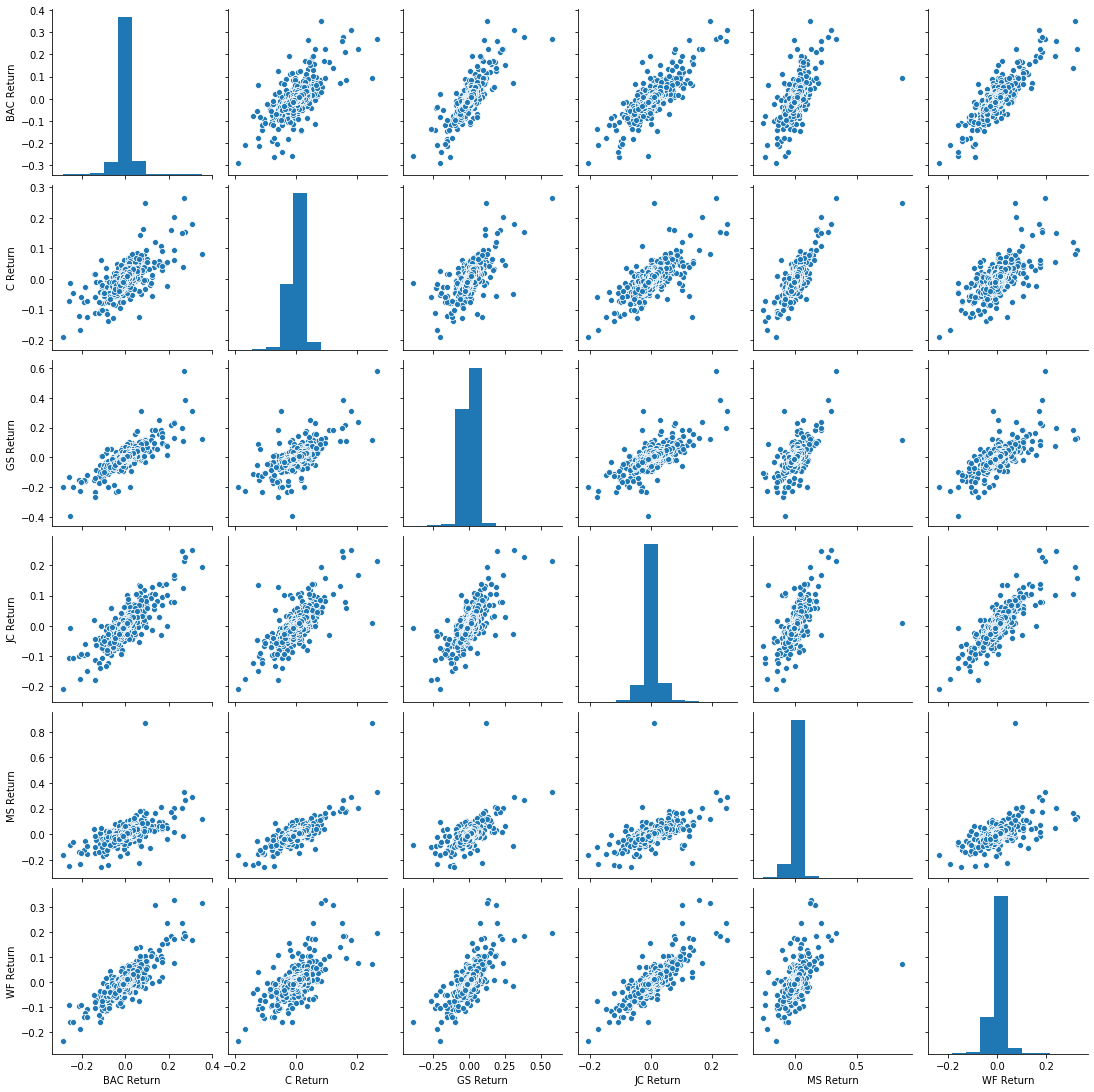

In [18]:
sns.pairplot(returns)

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [19]:
returns.head()

,BAC Return,C Return,GS Return,JC Return,MS Return,WF Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.013812,-0.018462,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,-0.000393,0.004961,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.014169,0.000000,0.007046,0.001025,0.005874
2006-01-09,0.000644,0.012030,-0.004731,0.016242,0.010586,-0.000158


In [20]:
returns.idxmin()

BAC Return   2009-01-20
C Return     2009-01-20
GS Return    2009-02-27
JC Return    2009-01-20
MS Return    2008-10-09
WF Return    2009-01-20
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [21]:
returns.idxmax()

BAC Return   2009-04-09
C Return     2008-11-24
GS Return    2008-11-24
JC Return    2009-01-21
MS Return    2008-10-13
WF Return    2008-07-16
dtype: datetime64[ns]

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [22]:
returns.std()

BAC Return    0.036647
C Return      0.025390
GS Return     0.038672
JC Return     0.027667
MS Return     0.037819
WF Return     0.030238
dtype: float64

In [23]:
returns.loc['2015-01-01':'2016-01-01'].std()

BAC Return    0.016163
C Return      0.014046
GS Return     0.015289
JC Return     0.014017
MS Return     0.016249
WF Return     0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

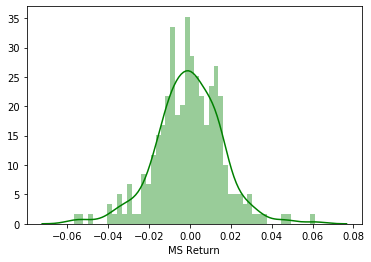

In [24]:
sns.distplot(returns['MS Return'].loc['2015-01-01':'2016-01-01'],bins=50,color='green')

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

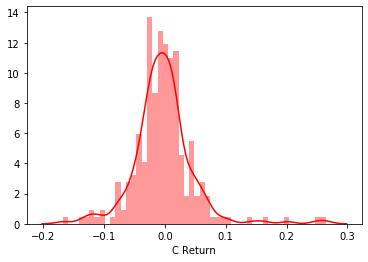

In [25]:
sns.distplot(returns['C Return'].loc['2008-01-01':'2009-01-01'],bins=50,color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

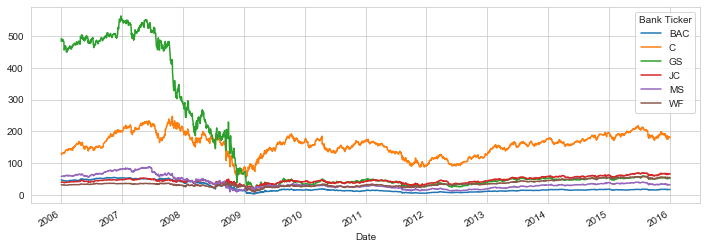

In [27]:

bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot(kind='line',figsize=(12,4))

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

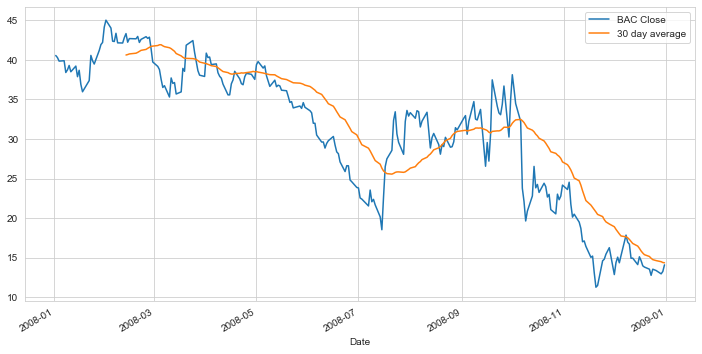

In [28]:
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].plot(kind='line',figsize=(12,6),label='BAC Close')
bank_stocks['BAC']['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 day average')
plt.legend()

** Create a heatmap of the correlation between the stocks Close Price.**

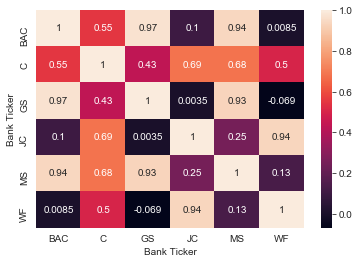

In [30]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

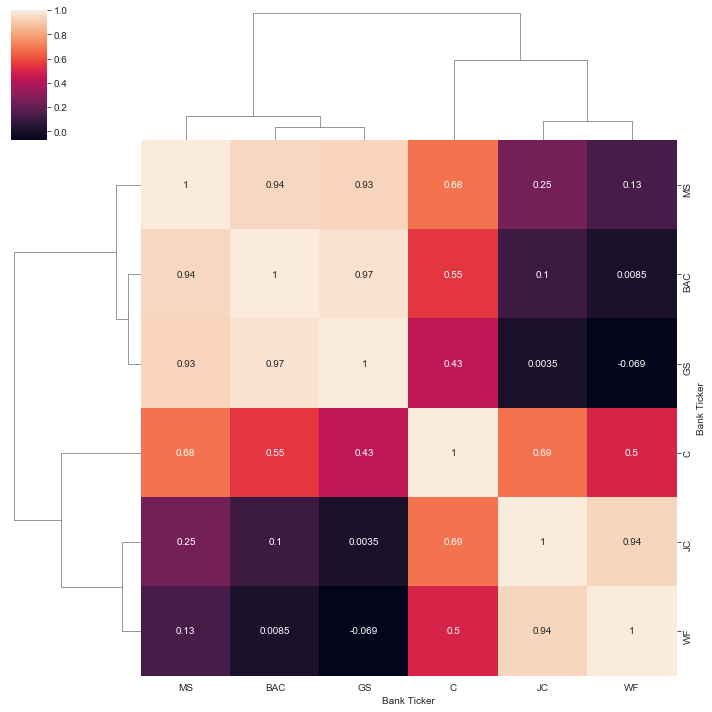

In [31]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [32]:
bank_stocks['BAC'].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [35]:
bank_stocks['MS']['Close'].loc['2015-01-01':'2016-01-01'].rolling(window=30).min().ta_plot(study='sma')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [36]:
bank_stocks['BAC']['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.